# GRIP - The Sparks Foundation


## Author: MANAN DAYMA

## Task 1: Prediction using Supervised Machine Learning

### Predict the percentage of an student based on the no. of study hours. What will be predicted score if a student studies for 9.25 hrs/ day?

## 1.) Collecting and understanding the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
 #Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading data from remote link
url =  "http://bit.ly/w-data"
df = pd.read_csv(url)

In [6]:
df.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
df.shape

(25, 2)

## 2. Exploratory Data Analysis(EDA)

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


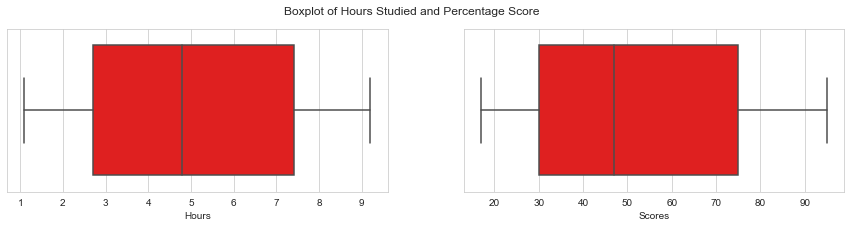

In [12]:
# To Check if there are any Outliers in the data with the help of Boxplot

fig, axes = plt.subplots(1,2, figsize = (15, 3))
fig.suptitle("Boxplot of Hours Studied and Percentage Score")
sns.set_style('whitegrid')
sns.boxplot(ax = axes[0], x = df['Hours'], color = 'red')
sns.boxplot(ax = axes[1], x = df['Scores'], color = 'red')
plt.show()

<AxesSubplot:>

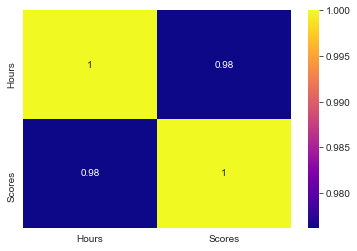

In [20]:
correlation = df.corr()
sns.heatmap(correlation, annot = True, cmap = "plasma")

### The correlation between Hours and Scores is 0.98

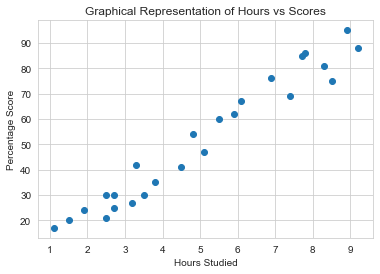

In [21]:
plt.scatter(df['Hours'], df['Scores'])
plt.title("Graphical Representation of Hours vs Scores")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

*From the above graph we observe a positive linear relation between the number of hours studied and the percentage of score.*

## 3.) Data Preprocessing

In [22]:
x = df["Hours"].values.reshape(-1,1) 
y = df["Scores"].values.reshape(-1,1)

## 4.) Modelling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
model =  LinearRegression()

In [24]:
model.fit(x_train, y_train)

LinearRegression()

## 5.) Visualize the model build

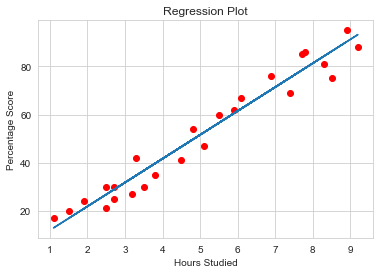

In [25]:
line = (model.coef_*x) + model.intercept_  
# Plotting for the Test Data
plt.scatter(x, y, c = "Red")
plt.plot(x, line)
plt.title('Regression Plot')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## 6.) Making Predictions

In [26]:
# Testing the data
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [27]:
# Model Prediction
y_pred = model.predict(x_test)

*Comparing Actual Data to the Predicted Model result*

In [28]:
# Comparing Actual vs Predicted
ap = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred.ravel()}) 
ap

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [29]:
#Estimating the Training and Test Score
print("Training Score:",model.score(x_train,y_train))
print("Test Score:",model.score(x_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105355


## 7.) Model Evaluation

In [30]:
from sklearn import metrics

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
R-2: 0.9454906892105355


R-2 gives the score of model fit and in this case we have R-2 = 0.9454906892105355 which is a great score for this model.

## What will be predicted score if a student studies for 9.25 hrs/ day?

In [31]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
percentage = model.predict(test)
percentage = np.round(percentage, decimals = 1)
print("Number of Hours studied per day: {}".format(hours))
print("Predicted Score: {}".format(percentage[0]))

Number of Hours studied per day: 9.25
Predicted Score: [93.7]


## CONCLUSION:

**If a student studies for 9.25 hrs/day, the predicted score will be 93.7**

*Thank You*